Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities
Question

In [2]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['pokemon'])


In [3]:

data = df[['id','num','name','img','type','height','weight','candy','candy_count','egg','spawn_chance','avg_spawns','spawn_time','multipliers','weaknesses','next_evolution']]

In [4]:
data.head(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0..."
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
dtypes: float64(3), int64(1), object(12)
memory usage: 19.0+ KB


In [6]:
data.describe

<bound method NDFrame.describe of       id  num        name                                               img  \
0      1  001   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2  002     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2      3  003    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3      4  004  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5  005  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
..   ...  ...         ...                                               ...   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   
148  149  149   Dragonite  http://www.serebii.net/pokemongo/pokemon/149.png   
149  150  150      Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151         Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

                 

In [16]:
data['spawn_minutes'] = pd.to_numeric(data['spawn_minutes'], errors='coerce')


In [10]:
data[['spawn_minutes', 'spawn_seconds']] = data['spawn_time'].str.split(':', expand=True)

In [17]:
filtered_pokemon_spawn_rate= data[data['spawn_minutes'] < 5]

In [18]:
print(filtered_pokemon_spawn_rate[['name', 'spawn_minutes']])

          name  spawn_minutes
6     Squirtle            4.0
8    Blastoise            0.0
10     Metapod            2.0
12      Weedle            2.0
13      Kakuna            2.0
..         ...            ...
127     Tauros            0.0
129   Gyarados            2.0
134    Jolteon            2.0
136    Porygon            2.0
139     Kabuto            0.0

[75 rows x 2 columns]


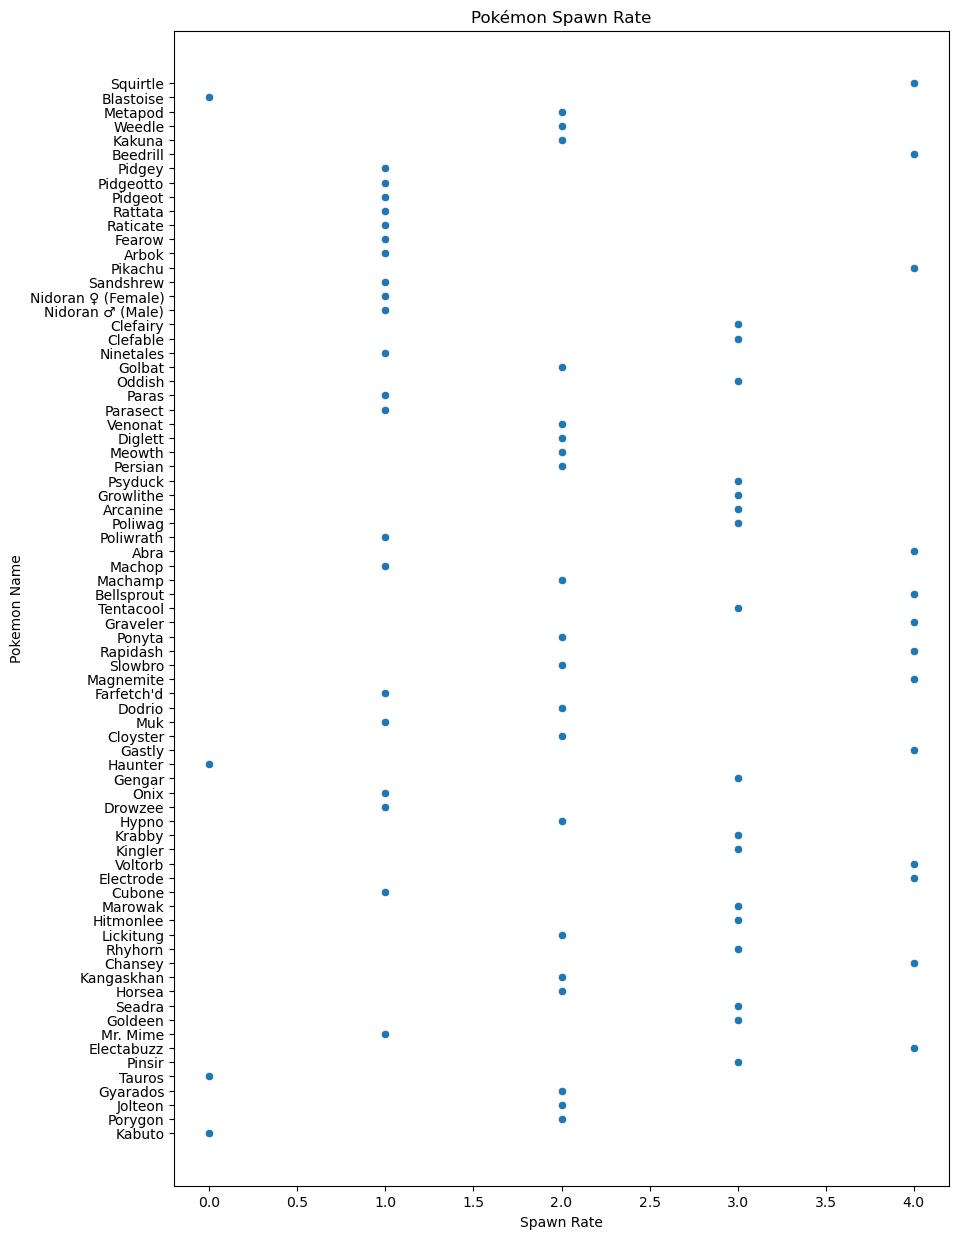

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
sns.scatterplot(data=filtered_pokemon_spawn_rate, x='spawn_minutes', y='name')
plt.title('Pokémon Spawn Rate')
plt.xlabel('Spawn Rate')
plt.ylabel('Pokemon Name')

# Display the plot
plt.show()

In [63]:
data.sample(2)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,spawn_minutes,spawn_seconds
92,93,093,Haunter,http://www.serebii.net/pokemongo/pokemon/093.png,"[Ghost, Poison]",1.60 m,0.1 kg,Gastly Candy,100.0,Not in Eggs,0.052,5.2,00:10,"[1.56, 1.8]","[Ground, Psychic, Ghost, Dark]","[{'num': '094', 'name': 'Gengar'}]",0.0,10
68,69,069,Bellsprout,http://www.serebii.net/pokemongo/pokemon/069.png,"[Grass, Poison]",0.71 m,4.0 kg,Bellsprout Candy,25.0,5 km,1.150,115.0,04:10,[1.57],"[Fire, Ice, Flying, Psychic]","[{'num': '070', 'name': 'Weepinbell'}, {'num':...",4.0,10


In [48]:
#Get all Pokemons that have less than 4 weaknesses
pokemon = data[data['weaknesses'].apply(lambda x: len(x) < 4)]
pokenmon_name_whose_weekness_less_than_four = pokemon[['name', 'weaknesses']]

In [49]:
pokenmon_name_whose_weekness_less_than_four

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [59]:
#Get all Pokemons that have no multipliers at all
pokemon_that_have_no_multipliwers = data[data['multipliers'].isnull()]
print(pokemon_that_have_no_multipliwers[['name','multipliers']])

           name multipliers
2      Venusaur        None
5     Charizard        None
8     Blastoise        None
11   Butterfree        None
14     Beedrill        None
..          ...         ...
144      Zapdos        None
145     Moltres        None
148   Dragonite        None
149      Mewtwo        None
150         Mew        None

[81 rows x 2 columns]


In [84]:
pokemons_less_than_two_evolution = data[data['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0) <= 2]


pokemons_less_than_two_evolution=(pokemons_less_than_two_evolution[['name', 'next_evolution']])

In [85]:
pokemons_less_than_two_evolution

,name,next_evolution
0,Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0..."
1,Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]"
2,Venusaur,NaN
3,Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':..."
4,Charmeleon,"[{'num': '006', 'name': 'Charizard'}]"
...,...,...
146,Dratini,"[{'num': '148', 'name': 'Dragonair'}, {'num': ..."
147,Dragonair,"[{'num': '149', 'name': 'Dragonite'}]"
148,Dragonite,NaN
149,Mewtwo,NaN


In [88]:
#Get all Pokemons whose spawn time is less than 300 seconds.
data.sample(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,spawn_minutes,spawn_seconds
50,51,051,Dugtrio,http://www.serebii.net/pokemongo/pokemon/051.png,[Ground],0.71 m,33.3 kg,Dugtrio,NaN,Not in Eggs,0.0140,1.40,12:37,None,"[Water, Grass, Ice]",NaN,12.0,37
113,114,114,Tangela,http://www.serebii.net/pokemongo/pokemon/114.png,[Grass],0.99 m,35.0 kg,None,NaN,5 km,0.2280,22.80,23:13,None,"[Fire, Ice, Poison, Flying, Bug]",NaN,23.0,13
88,89,089,Muk,http://www.serebii.net/pokemongo/pokemon/089.png,[Poison],1.19 m,30.0 kg,Grimer Candy,NaN,Not in Eggs,0.0031,0.31,01:28,None,"[Ground, Psychic]",NaN,1.0,28


In [97]:
#data[['spawn_minutes', 'spawn_seconds']] = data['spawn_time'].str.split(':', expand=True)
pokemon_spwan_time_less_than_five = data[data['spawn_minutes'] < 5]
pokemon_spwan_time_less_than_five[['name','spawn_minutes']]

,name,spawn_minutes
6,Squirtle,4.0
8,Blastoise,0.0
10,Metapod,2.0
12,Weedle,2.0
13,Kakuna,2.0
...,...,...
127,Tauros,0.0
129,Gyarados,2.0
134,Jolteon,2.0
136,Porygon,2.0


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [6]:
import pandas as pd
import requests
url = 'https://data.nasa.gov/resource/y77d-th95.json'
response = requests.get(url)
data = response.json()

df1 = pd.json_normalize(data)
data= pd.DataFrame(df1)
print(data.head())

data = data[['name','id','nametype','recclass','mass','fall','year','reclat','reclong','geolocation.type','geolocation.coordinates']]
data.head(3)

       name   id nametype     recclass    mass  fall                     year  \
0    Aachen    1    Valid           L5      21  Fell  1880-01-01T00:00:00.000   
1    Aarhus    2    Valid           H6     720  Fell  1951-01-01T00:00:00.000   
2      Abee    6    Valid          EH4  107000  Fell  1952-01-01T00:00:00.000   
3  Acapulco   10    Valid  Acapulcoite    1914  Fell  1976-01-01T00:00:00.000   
4   Achiras  370    Valid           L6     780  Fell  1902-01-01T00:00:00.000   

       reclat      reclong geolocation.type geolocation.coordinates  \
0   50.775000     6.083330            Point       [6.08333, 50.775]   
1   56.183330    10.233330            Point    [10.23333, 56.18333]   
2   54.216670  -113.000000            Point        [-113, 54.21667]   
3   16.883330   -99.900000            Point       [-99.9, 16.88333]   
4  -33.166670   -64.950000            Point     [-64.95, -33.16667]   

  :@computed_region_cbhk_fwbd :@computed_region_nnqa_25f4  
0                         

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,Point,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,Point,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,Point,"[-113, 54.21667]"


In [12]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,year_fell
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,Point,"[6.08333, 50.775]",1880-01-01
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,Point,"[10.23333, 56.18333]",1951-01-01
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,Point,"[-113, 54.21667]",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,Point,"[-99.9, 16.88333]",1976-01-01
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,Point,"[-64.95, -33.16667]",1902-01-01


In [17]:
####● Get all the Earth meteorites that fell before the year 2000
import datetime
#data['year_fell'] = pd.to_datetime(data['year'], errors='coerce')
meteorited_before = data[(data['year_fell'].dt.year < 2000) & data['year_fell'].notnull()]
meteorited_before[['name','year_fell']].sample(6)



,name,year_fell
419,Jilin,1976-01-01
370,Haverö,1971-01-01
787,Pettiswood,1779-01-01
842,Reliegos,1947-01-01
43,Appley Bridge,1914-01-01
892,Schellin,1715-01-01


In [32]:
#Get all the earth meteorites co-ordinates who fell before the year 1970
meteorited_before_1700 = data[(data['mass'].dt.year < 1700) & data['year_fell'].notnull()]
meteorited_before_1700[['geolocation.coordinates','year_fell']].head()


,geolocation.coordinates,year_fell
887,"[137.78333, 34.71667]",1688-01-01


In [43]:
data['mass'].isnull().sum()

28

In [47]:
data['mass'] =data['mass'].astype(float)

In [48]:
data['mass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: mass
Non-Null Count  Dtype  
--------------  -----  
972 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [52]:
#Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
#than 10000kg
mass_more_than_10000 = data[(data['mass'] > 10000 ) & data['mass'].notnull()]
mass_more_than_10000[['name','mass']].head(1000)


,name,mass
2,Abee,107000.0
7,Agen,30000.0
11,Aïr,24000.0
16,Akyumak,50000.0
27,Alfianello,228000.0
...,...,...
991,Tieschitz,28000.0
992,Tilden,74800.0
994,Timochin,65500.0
997,Tjabe,20000.0


Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [16]:
import pandas as pd
import requests
import json
import datetime


def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data


def extract_data(data):
    episodes = []

    for episode_data in data:
        episode = {}

        # Extracting the desired attributes from each episode data
        episode['id'] = episode_data['id']
        episode['url'] = episode_data['url']
        episode['name'] = episode_data['name']
        episode['season'] = episode_data['season']
        episode['number'] = episode_data['number']
        episode['type'] = episode_data['type']
        episode['airdate'] = datetime.datetime.strptime(episode_data['airdate'], "%Y-%m-%d").date()
        episode['airtime'] = datetime.datetime.strptime(episode_data['airtime'], "%H:%M").strftime("%I:%M %p")
        episode['runtime'] = float(episode_data['runtime'])
        episode['rating'] = float(episode_data['rating']['average'])
        episode['summary'] = episode_data['summary'].replace("<p>", "").replace("</p>", "")
        episode['medium_image'] = episode_data['image']['medium']
        episode['original_image'] = episode_data['image']['original']

        episodes.append(episode)

    return episodes


if __name__ == '__main__':
    url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

    # Downloading the data
    episode_data = download_data(url)

    # Extracting the desired data
    extracted_data = extract_data(episode_data['_embedded']['episodes'])

    # Creating a DataFrame
    df = pd.DataFrame(extracted_data)
    df.head()

  
    


In [20]:
df.sample(3)

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image,original_image
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,09:00 PM,60.0,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
34,2326660,https://www.tvmaze.com/episodes/2326660/westwo...,Metanoia,4,7,regular,2022-08-07,09:00 PM,60.0,7.7,You want to have a drink at a time like this?,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              36 non-null     int64  
 1   url             36 non-null     object 
 2   name            36 non-null     object 
 3   season          36 non-null     int64  
 4   number          36 non-null     int64  
 5   type            36 non-null     object 
 6   airdate         36 non-null     object 
 7   airtime         36 non-null     object 
 8   runtime         36 non-null     float64
 9   rating          36 non-null     float64
 10  summary         36 non-null     object 
 11  medium_image    36 non-null     object 
 12  original_image  36 non-null     object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.8+ KB


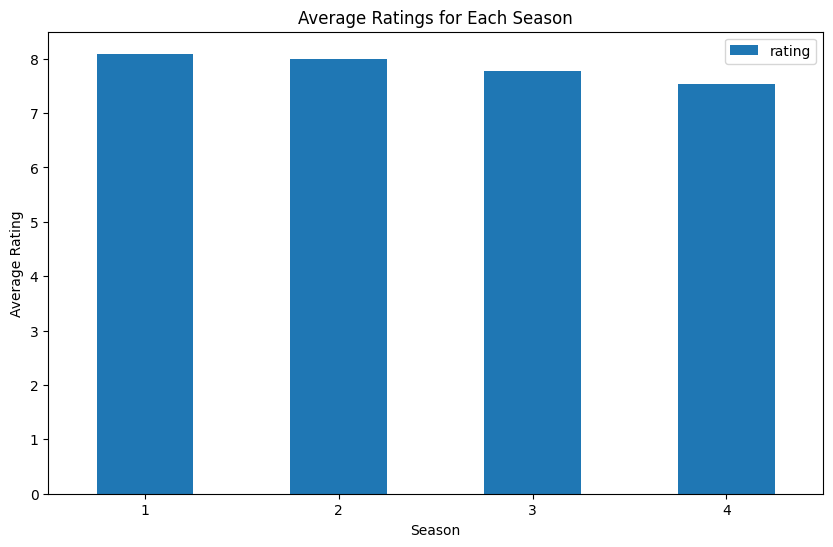

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'season' and 'rating'

# Extract necessary data
ratings_data = df[['season', 'rating']]

# Group by season and calculate average rating
season_ratings = ratings_data.groupby('season').mean()

# Plotting the ratings for each season
season_ratings.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.xticks(rotation=0)
plt.show()


● Get all the episode names, whose average rating is more than 8 for every season

In [44]:
df[['name','rating']].sample(3)

,name,rating
26,Passed Pawn,7.5
9,The Bicameral Mind,8.7
6,Trompe L'Oeil,8.6


In [64]:
import pandas as pd


season_ratings = df.groupby('season')['rating'].mean()

# Get the episode names for each season with average rating > 8
episode_names = {}
for season in season_ratings.index:
    season_data = df[(df['season'] == season) & (df['rating'] > 8)]
    episode_names[season] = season_data['name'].tolist()

# Print episode names for each season with average rating > 8
for season, names in episode_names.items():
    print(f"Season {season} episodes with average rating > 8:")
    for name in names:
        print(name)
    print()



Season 1 episodes with average rating > 8:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 episodes with average rating > 8:
Kiksuya
Vanishing Point
The Passenger

Season 3 episodes with average rating > 8:

Season 4 episodes with average rating > 8:



Get all the episode names that aired before May 2019


In [49]:
df[['name','airdate']].sample(3)

,name,airdate
23,The Mother of Exiles,2020-04-05
34,Metanoia,2022-08-07
0,The Original,2016-10-02


In [67]:
df.sample()

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image,original_image
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,09:00 PM,60.0,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [71]:
import datetime

# Convert the airdate column to datetime
df['airdate'] = pd.to_datetime(df['airdate'])

# Filter episodes aired before May 2019
filtered_episodes = df[df['airdate'] < datetime.datetime(2019, 5, 1)]

# Get the episode names and years
episode_names = filtered_episodes[['name', 'airdate']].values.tolist()

# Print the episode names with years
for name, year in episode_names:
    print(f"{name} ,{year})")
print(end="/")




The Original ,2016-10-02 00:00:00)
Chestnut ,2016-10-09 00:00:00)
The Stray ,2016-10-16 00:00:00)
Dissonance Theory ,2016-10-23 00:00:00)
Contrapasso ,2016-10-30 00:00:00)
The Adversary ,2016-11-06 00:00:00)
Trompe L'Oeil ,2016-11-13 00:00:00)
Trace Decay ,2016-11-20 00:00:00)
The Well-Tempered Clavier ,2016-11-27 00:00:00)
The Bicameral Mind ,2016-12-04 00:00:00)
Journey Into Night ,2018-04-22 00:00:00)
Reunion ,2018-04-29 00:00:00)
Virtù e Fortuna ,2018-05-06 00:00:00)
The Riddle of the Sphinx ,2018-05-13 00:00:00)
Akane No Mai ,2018-05-20 00:00:00)
Phase Space ,2018-05-27 00:00:00)
Les Écorchés ,2018-06-03 00:00:00)
Kiksuya ,2018-06-10 00:00:00)
Vanishing Point ,2018-06-17 00:00:00)
The Passenger ,2018-06-24 00:00:00)
/

Get the episode name from each season with the highest and lowest rating

In [82]:
df[['name','season','rating']]

,name,season,rating
0,The Original,1,8.0
1,Chestnut,1,7.7
2,The Stray,1,7.6
3,Dissonance Theory,1,7.9
4,Contrapasso,1,8.0
5,The Adversary,1,8.0
6,Trompe L'Oeil,1,8.6
7,Trace Decay,1,7.9
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7


In [83]:
# Group the data by season and find the episode with the highest and lowest rating for each season
season_high_rating = df.groupby('season')['rating'].idxmax()
season_low_rating = df.groupby('season')['rating'].idxmin()

# Get the episode name, season, highest rating, and lowest rating
highest_rated_episodes = df.loc[season_high_rating, ['name', 'season', 'rating']]
lowest_rated_episodes = df.loc[season_low_rating, ['name', 'season', 'rating']]

# Print the episode name, season, highest rating, and lowest rating for each season
for season in df['season'].unique():
    highest_rating = highest_rated_episodes[highest_rated_episodes['season'] == season]
    lowest_rating = lowest_rated_episodes[lowest_rated_episodes['season'] == season]
    print(f"Season {season}:")
    print("Highest Rated Episode:")
    print(highest_rating)
    print("Lowest Rated Episode:")
    print(lowest_rating)
    print()

        

Season 1:
Highest Rated Episode:
                 name  season  rating
9  The Bicameral Mind       1     8.7
Lowest Rated Episode:
        name  season  rating
2  The Stray       1     7.6

Season 2:
Highest Rated Episode:
       name  season  rating
17  Kiksuya       2     8.7
Lowest Rated Episode:
            name  season  rating
14  Akane No Mai       2     7.6

Season 3:
Highest Rated Episode:
            name  season  rating
20  Parce Domine       3     8.0
Lowest Rated Episode:
           name  season  rating
25  Decoherence       3     7.5

Season 4:
Highest Rated Episode:
        name  season  rating
32  Zhuangzi       4     7.8
Lowest Rated Episode:
            name  season  rating
28  The Auguries       4     7.1



Get the summary for the most popular ( ratings ) episode in every season

In [85]:
# Get the most popular episode (highest rating) for each season
most_popular_episodes = df.groupby('season')['rating'].idxmax()
most_popular_df = df.loc[most_popular_episodes, ['season', 'name', 'rating', 'summary']]

# Print the summary for the most popular episode in each season
for season in df['season'].unique():
    episode = most_popular_df[most_popular_df['season'] == season]
    print(f"Season {season}:")
    print("Most Popular Episode:")
    print(f"Name: {episode['name'].values[0]}")
    print(f"Rating: {episode['rating'].values[0]}")
    print(f"Summary: {episode['summary'].values[0]}")
    print()


Season 1:
Most Popular Episode:
Name: The Bicameral Mind
Rating: 8.7
Summary: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2:
Most Popular Episode:
Name: Kiksuya
Rating: 8.7
Summary: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3:
Most Popular Episode:
Name: Parce Domine
Rating: 8.0
Summary: If you're stuck in a loop, try walking in a straight line.

Season 4:
Most Popular Episode:
Name: Zhuangzi
Rating: 7.8
Summary: God is bored.



Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [89]:
import pandas as pd
data=pd.read_csv('Downloads/Electric_Vehicle_Population_Data.csv')


In [93]:
data.sample(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
22163,KNDCC3LG0K,King,Shoreline,WA,98177.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,32.0,2649293,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
110185,WVWPP7AU4G,King,Issaquah,WA,98027.0,2016,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,83,0,5.0,179575987,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129889 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         129889 non-null  object 
 1   County                                             129889 non-null  object 
 2   City                                               129889 non-null  object 
 3   State                                              129889 non-null  object 
 4   Postal Code                                        129889 non-null  float64
 5   Model Year                                         129889 non-null  int64  
 6   Make                                               129889 non-null  object 
 7   Model                                              129889 non-null  object 
 8   Electric Vehicle Type                              129889 non-null  object 
 9 

In [107]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [108]:
data = data.dropna()

In [111]:
data.sample(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
124556,5YJ3E1EA4K,King,Seattle,WA,98107.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,477898193,POINT (-122.37814999999995 47.668660000000045),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
110086,WBY1Z2C50E,Snohomish,Brier,WA,98036.0,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,1.0,245013450,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10


● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after

In [96]:
df =data[['Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make','Model','Electric Vehicle Type']]

In [97]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [118]:
# Filter the cars that do not qualify for clean alternative fuel vehicle
not_qualified_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']

# Select the desired columns
filtered_data = not_qualified_cars[['Make','Model', 'Electric Vehicle Type']]

# Print the cars and their types that do not qualify for clean alternative fuel vehicle
print(filtered_data)


          Make    Model                   Electric Vehicle Type
6         FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)
7         AUDI     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)
8         FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
11       TESLA  MODEL Y          Battery Electric Vehicle (BEV)
14        FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
...        ...      ...                                     ...
130437     BMW     530E  Plug-in Hybrid Electric Vehicle (PHEV)
130438   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130439  NISSAN     LEAF          Battery Electric Vehicle (BEV)
130440   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130442   TESLA  MODEL 3          Battery Electric Vehicle (BEV)

[69487 rows x 3 columns]


● Get all TESLA cars with the model year, and model type made in Bothell City.

In [116]:
data['City'].unique()

array(['Yakima', 'Poulsbo', 'Seattle', 'Lacey', 'Olympia', 'Tumwater',
       'Rochester', 'Bremerton', 'Bainbridge Island', 'Everett',
       'Leavenworth', 'Mill Creek', 'Snohomish', 'Mount Vernon',
       'Arlington', 'Lake Stevens', 'Burlington', 'Anacortes', 'Edmonds',
       'Bothell', 'Sultan', 'Spokane', 'Pullman', 'Yelm', 'Port Orchard',
       'Palouse', 'Monroe', 'Marysville', 'Mukilteo', 'Brier', 'Lynnwood',
       'Kettle Falls', 'Orondo', 'Selah', 'Oak Harbor', 'Clinton',
       'Cheney', 'Granite Falls', 'Renton', 'Walla Walla', 'Freeland',
       'Kent', 'Redmond', 'Vancouver', 'Tukwila', 'Federal Way',
       'Kirkland', 'Bellevue', 'Battle Ground', 'Duvall', 'Brush Prairie',
       'Sammamish', 'Burien', 'Auburn', 'Bingen', 'Camas', 'Issaquah',
       'Shoreline', 'Covington', 'Woodinville', 'Longview', 'Olalla',
       'Normandy Park', 'Port Townsend', 'North Bend', 'Seabeck',
       'Medina', 'Maple Valley', 'Newcastle', 'Des Moines', 'Ridgefield',
       'Washougal

In [125]:
# Filter the cars that do not qualify for clean alternative fuel vehicle
bothel_city_car = data[data['City'] == 'Bothell']

df = bothel_city_car[['Make','Model Year', 'Electric Vehicle Type']]

# Print the cars and their types that do not qualify for clean alternative fuel vehicle
print(df)

            Make  Model Year                   Electric Vehicle Type
36           KIA        2022  Plug-in Hybrid Electric Vehicle (PHEV)
39         TESLA        2020          Battery Electric Vehicle (BEV)
56        NISSAN        2017          Battery Electric Vehicle (BEV)
217        TESLA        2022          Battery Electric Vehicle (BEV)
218        TESLA        2022          Battery Electric Vehicle (BEV)
...          ...         ...                                     ...
130001      FORD        2022  Plug-in Hybrid Electric Vehicle (PHEV)
130074       KIA        2022          Battery Electric Vehicle (BEV)
130177  CHRYSLER        2018  Plug-in Hybrid Electric Vehicle (PHEV)
130295     TESLA        2022          Battery Electric Vehicle (BEV)
130392     TESLA        2018          Battery Electric Vehicle (BEV)

[4020 rows x 3 columns]


● Get all the cars that have an electric range of more than 100, and were made after

In [130]:
data.sample(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
67452,7SAYGAEE0P,King,Kirkland,WA,98034.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,227427007,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
118205,7SAYGDEE5N,Spokane,Spokane,WA,99201.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,3.0,200733333,POINT (-117.41162 47.65726),MODERN ELECTRIC WATER COMPANY,5.306300e+10


In [136]:
range_above_100 = data[data['Electric Range'] > 100]
data_above_range_100 = range_above_100[['Make', 'Model','Electric Range']]
print(data_above_range_100)


          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
9        TESLA  MODEL S             208
12       TESLA  MODEL 3             308
...        ...      ...             ...
130418   TESLA  MODEL S             208
130428  NISSAN     LEAF             151
130432   TESLA  MODEL Y             291
130436   TESLA  MODEL 3             215
130441   TESLA  MODEL X             293

[36716 rows x 3 columns]


In [141]:
num_columns = data.columns[data.dtypes != 'object']


In [144]:
num_columns = data.select_dtypes(include='number')


<Axes: >

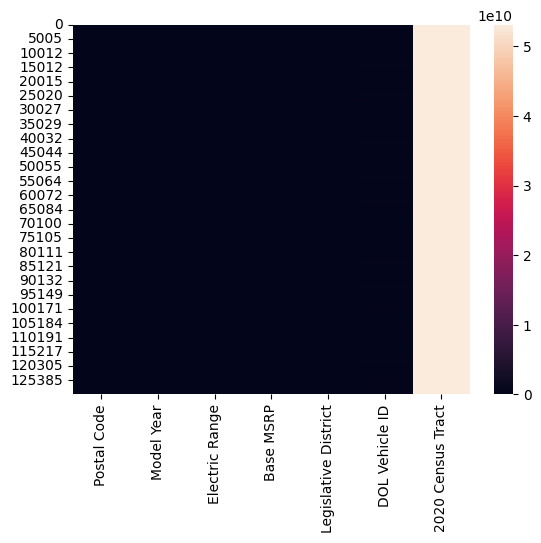

In [145]:
import seaborn as sns

sns.heatmap(num_columns)


Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [105]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)
    
    # Initialize counts for each POS tag
    counts = {'Noun': 0, 'Verb': 0, 'Pronoun': 0, 'Adjective': 0}
    
    # Iterate through the tagged words and count the POS tags
    for word, tag in tagged_words:
        if tag.startswith('N'):  # Noun
            counts['Noun'] += 1
        elif tag.startswith('V'):  # Verb
            counts['Verb'] += 1
        elif tag.startswith('PRP'):  # Pronoun
            counts['Pronoun'] += 1
        elif tag.startswith('JJ'):  # Adjective
            counts['Adjective'] += 1
    
    return counts


text1 = "The quick brown fox jumps over the lazy dog."
counts1 = count_pos_tags(text1)
print(counts1)



{'Noun': 3, 'Verb': 1, 'Pronoun': 0, 'Adjective': 2}
